In [ ]:
###This code is to simulate Pion with the Sanford-Wang double differential cross section

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [2]:
###this is the proton beam momentum in GeV
p_beam = 8.890

In [3]:
###mass pion zero in GeV
pion_mass = 0.135

In [4]:
######SW costants for pion plus
c_1_plus = 220.7
c_2_plus = 1.080
c_3_plus = 1.000
c_4_plus = 1.978
c_5_plus = 1.32
c_6_plus = 5.572
c_7_plus = 0.0868
c_8_plus = 9.686
c_9_plus = 1.000

In [5]:
######SW costants for pion minus
c_1_minus = 213.7
c_2_minus = 0.9379
c_3_minus = 5.4545
c_4_minus = 1.210
c_5_minus = 1.284
c_6_minus = 4.781
c_7_minus = 0.07338
c_8_minus = 8.329
c_9_minus = 1.000

In [6]:
###Plotting SW distribution using rejection method as in https://arxiv.org/pdf/1609.01770.pdf appendix H

In [7]:
####creating SW distribution sampling theta from 0 to pi therefore w/ Jacobian

In [8]:
#pion plus as double function sampling theta
#x=angle y=momentum
def j_bis(x,y):
    return c_1_plus*pow(y,c_2_plus)*(1-(y/p_beam))*np.exp(-c_3_plus*(pow(y,c_4_plus)/(pow(p_beam,c_5_plus)))-c_6_plus*x*(y-c_7_plus*p_beam*(pow(np.cos(x),c_8_plus))))*2*np.pi*np.sin(x)

In [9]:
#pion minus as double function sampling theta
def k_bis(x,y):
    return c_1_minus*pow(y,c_2_minus)*(1-(y/p_beam))*np.exp(-c_3_minus*(pow(y,c_4_minus)/(pow(p_beam,c_5_minus)))-c_6_minus*x*(y-c_7_minus*p_beam*(pow(np.cos(x),c_8_minus))))*np.sin(x)*2*np.pi

In [10]:
#pion zero as double function sampling theta
def l_bis(x,y):
    return (j_bis(x,y)+k_bis(x,y))/2

In [11]:
angle_max = []
momentum_max = []
number_max = 10000000 #10 millions

for i in range (number_max):
    angle_max.append(uniform(0,np.pi/2))
    momentum_max.append(uniform(0,8))


In [13]:
sw_max_list = []
for i in range (number_max):
    sw_max_list.append(l_bis(angle_max[i],momentum_max[i]))

In [14]:
sw_max=max(sw_max_list)
print(sw_max)

171.4255785585637


In [15]:
###clear memory from lists I am now using again

angle_max = None
del angle_max
momentum_max = None
del momentum_max
sw_max_list = None
del sw_max_list

In [ ]:
####this is without Jacobian, sampling from cosine, and in GeV
zero_and_one = None
del zero_and_one
random_angle = None
del random_angle
random_momentum = None
del random_momentum
good_angle = None
del good_angle
good_momentum = None
del good_momentum
sw_values = None
del sw_values

#number=9000000
number = 100000000 #10 millions
zero_and_one = [number]
zero_and_one = np.random.random(number)
random_angle = []
random_momentum = []
good_angle = []
good_momentum = []
sw_values = []

for i in range (number):
    random_angle.append(uniform(0,np.pi/2))
    random_momentum.append(uniform(0,8))
    if l_bis(random_angle[i], random_momentum[i])>zero_and_one[i]*sw_max:
        good_angle.append(random_angle[i])
        good_momentum.append(random_momentum[i])
        sw_values.append(l_bis(random_angle[i], random_momentum[i]))

In [28]:
print(len(good_angle))

7183961


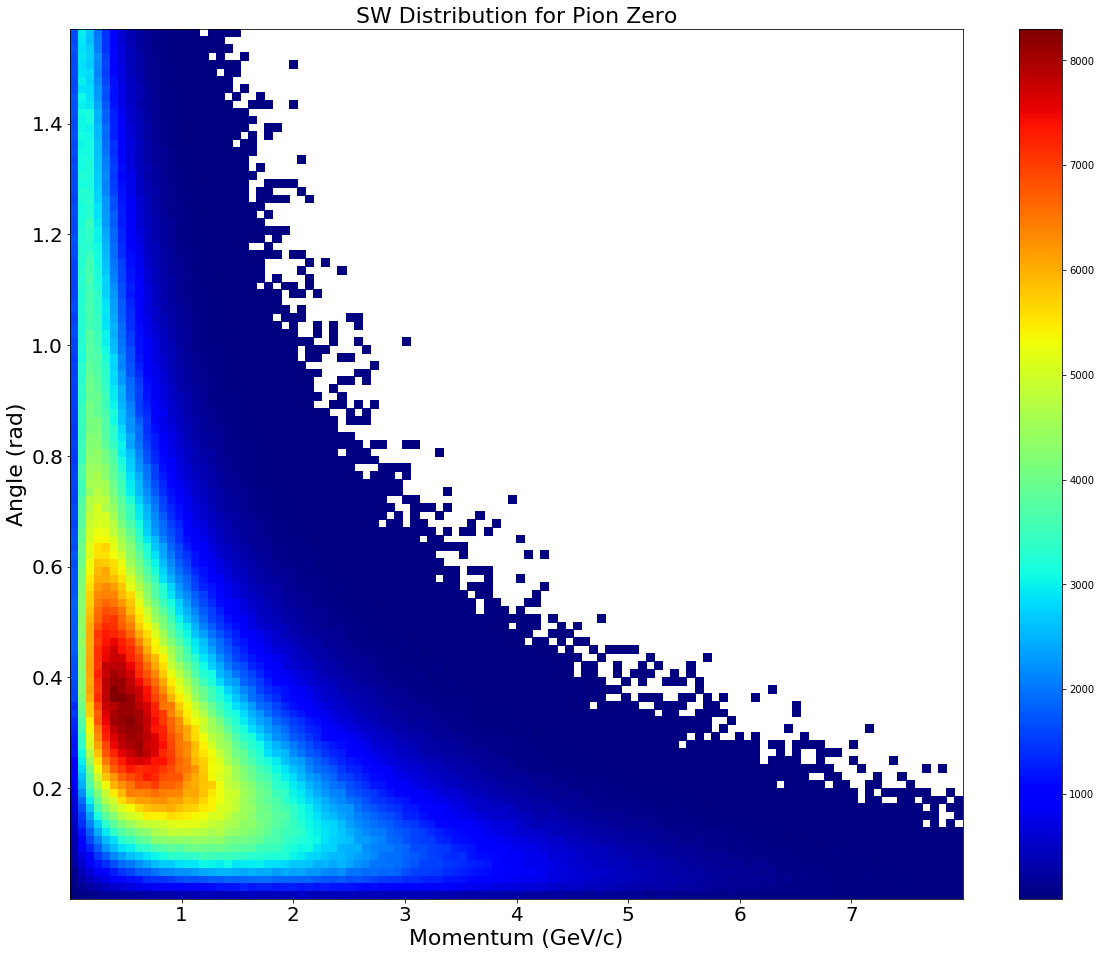

In [29]:
from matplotlib import cm
plt.figure(figsize=(20,16))
h = plt.hist2d(good_momentum, good_angle, bins=[110,110],cmin=0.000001,cmap='jet')
plt.colorbar(h[3])
plt.title("SW Distribution for Pion Zero",fontsize=22)
plt.xlabel("Momentum (GeV/c)",fontsize=22)
plt.ylabel("Angle (rad)",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
###Create the momentum vector

In [33]:
energy_vector = []
###convert momentum in energy (MeV)
for i in range(len(good_momentum)):
    energy_vector.append(np.sqrt(pow(good_momentum[i],2)+pow(pion_mass,2))*1000)

In [35]:
angle_phi = []
####sample angle phi from 0 to 2*np.pi
for i in range(len(good_momentum)):
    angle_phi.append(uniform(0,2*np.pi))

In [36]:
####calculate the SW value for each couple angle-momentum. It will be used as weight
sanford_wang = []
for i in range(len(good_momentum)):
    sanford_wang.append(l_bis(good_angle[i], good_momentum[i]))

In [43]:
####if I want to use sanford_wang values as weights and multiply them by the four momenta elements, I need to convert this into
####int because you can multiply a list by an integer but not by a float
sanford_wang_int = []
for i in range(len(good_momentum)):
    sanford_wang_int.append(int(sanford_wang[i]))

In [58]:
####create the four-momentum vector, where for each pion zero the related sanford-wang value is used as weight
four_momenta = None
del four_momenta
four_momenta = []
for i in range(10):
    #four_momenta.append(sanford_wang_int[i]*(energy_vector[i],np.cos(angle_phi[i])*np.sin(good_angle[i]),np.sin(angle_phi[i])*np.sin(good_angle[i]),np.cos(good_angle[i])))
        four_momenta.append((energy_vector[i],np.cos(angle_phi[i])*np.sin(good_angle[i]),np.sin(angle_phi[i])*np.sin(good_angle[i]),np.cos(good_angle[i])))

In [59]:
for i in range(1):
    print(four_momenta[i])

(4075.2145080070727, -0.046891341589002725, 0.03996307936486721, 0.9981002727039306)


In [ ]:
four_momenta_weighted = []
for y in range(len(sanford_wang)):
    four_momenta_weighted.append([i * sanford_wang_int[y] for i in four_momenta])

In [ ]:
for i in range(1):
    print(four_momenta_weighted[i])

In [ ]:
###last piece: converting the list into an n-dimensional array that can be downloaded
four_momenta_weighted_array=np.ndarray(four_momenta_weighted_array)

In [ ]:
##SANITY CHECK

In [ ]:
####creating SW distribution sampling cos(theta) from -1 to 1 therefore w/o Jacobian

In [5]:
#pion plus as double function sampling cosine(theta)
#x=cosine y=momentum
def j(x,y):
    return c_1_plus*pow(y,c_2_plus)*(1-(y/p_beam))*np.exp(-c_3_plus*(pow(y,c_4_plus)/(pow(p_beam,c_5_plus)))-c_6_plus*np.arccos(x)*(y-c_7_plus*p_beam*(pow(x,c_8_plus))))

In [6]:
#pion minus as double function sampling cosine(theta)
def k(x,y):
    return c_1_minus*pow(y,c_2_minus)*(1-(y/p_beam))*np.exp(-c_3_minus*(pow(y,c_4_minus)/(pow(p_beam,c_5_minus)))-c_6_minus*np.arccos(x)*(y-c_7_minus*p_beam*(pow(x,c_8_minus))))

In [7]:
#pion zero as double function sampling cosine(theta)
def l(x,y):
    return (j(x,y)+k(x,y))/2

In [ ]:
###in oder to use rejection sampling, I must find the maximum of the Sanford-Wang distribution. 
### I will create number_max couples of randomly picked cosine and momenta and see which is the highest value of SW I can get
#### that will be my sw_max

In [8]:
cosine_max = []
momentum_max = []
number_max = 10000000 #10 millions

for i in range (number_max):
    cosine_max.append(uniform(0,1))
    momentum_max.append(uniform(0,8))


In [9]:
for i in range(10):
    print(cosine_max[i]," ",momentum_max[i]," ",l(cosine_max[i],momentum_max[i]))

0.5149165798044882   7.763958943640166   4.5791185114996725e-17
0.3643753310735257   2.4692826736720486   5.916479314974778e-05
0.7840942165193917   0.6577865531900802   15.944438858591578
0.6514507119347519   1.8654033435254869   0.056742246841707956
0.5059218371291706   7.340271855605311   4.322602521540383e-16
0.929573629791084   7.7241411326689855   4.2405008963076e-06
0.5668077187128227   5.709411598803481   4.625875707684577e-11
0.455701818169978   0.8959042253582616   0.9448483594742907
0.02497680022843285   4.471612693964931   1.2921189059880257e-13
0.6942911993804313   0.1888693560349184   19.9041653397406


In [10]:
sw_max_list = []
for i in range (number_max):
    sw_max_list.append(l(cosine_max[i],momentum_max[i]))

In [11]:
sw_max=max(sw_max_list)
print(sw_max)

218.6201113100887


In [12]:
###clear memory from lists I am not using again

cosine_max = None
del cosine_max
momentum_max = None
del momentum_max
sw_max_list = None
del sw_max_list

In [13]:
####this is without Jacobian, sampling from cosine, and in MeV
zero_and_one = None
del zero_and_one
random_cosine = None
del random_cosine
random_momentum = None
del random_momentum
good_cosine = None
del good_cosine
good_momentum = None
del good_momentum

number = 100000000 #10 millions
zero_and_one = [number]
zero_and_one = np.random.random(number)
random_cosine = []
random_momentum = []
good_cosine = []
good_momentum = []

for i in range (number):
    random_cosine.append(uniform(0,1))
    random_momentum.append(uniform(0,8))
    if l(random_cosine[i], random_momentum[i])>zero_and_one[i]*sw_max:
        good_cosine.append(random_cosine[i])
        good_momentum.append(random_momentum[i])

In [14]:
print(len(good_momentum))

1409030


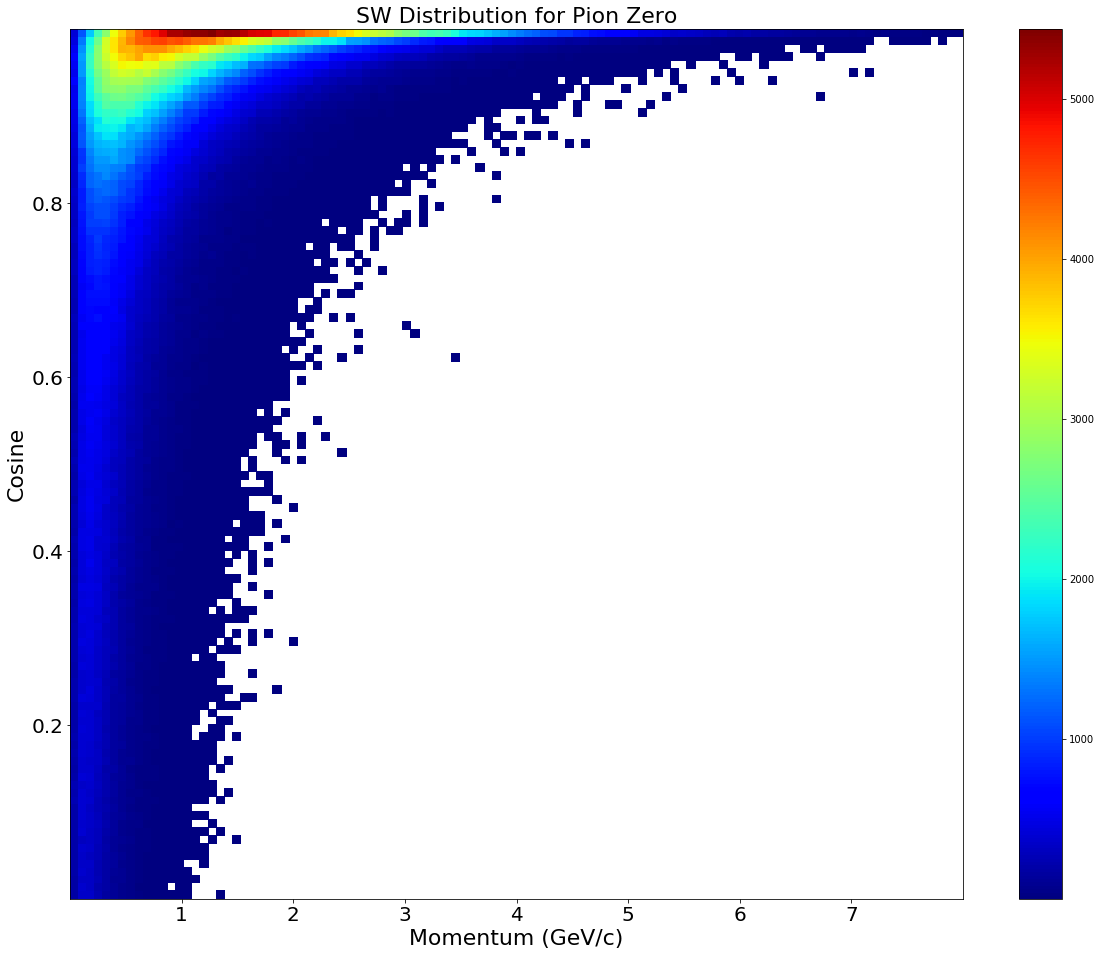

In [15]:
from matplotlib import cm
plt.figure(figsize=(20,16))
h = plt.hist2d(good_momentum, good_cosine, bins=[110,110],cmin=0.000001,cmap='jet')
plt.colorbar(h[3])
plt.title("SW Distribution for Pion Zero",fontsize=22)
plt.xlabel("Momentum (GeV/c)",fontsize=22)
plt.ylabel("Cosine",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()